In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# I don't understand why it's shaped like this. One of them should be slit position and another be the other spatial dimension
# 11 = physical quantities
# 81 = log(tau)
# 486 = ??? 
# 237 = ???
# The width of the slit covers 11-12 pixels in resolution in spatial dimension. Decided to bin by 11/12px
# Some pixels fall away, because the pixel size of the two arms are not the same
# There are some edge effects, so 486, won't quite be the same. Be close... 1-2 pixels on the sides. 
# WCS - be careful which arm. One will be the base, the other we will match to the base. Carry over the world coordinates from the one we use as the base. The other one we adapt to that. 
#  - same with the time. There will be a slight shift. If in the scan direction, might be due to the refraction of the light in the atmosphere. 
#  - they might be a few seconds apart. But we will have to live with that. 
#  - Always the same arm (630?). Use the information in the 630 arm. The L1 file in the same position. 
hdul[0].data.shape

(11, 81, 486, 237)

In [6]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                  237                                                  
NAXIS2  =                  486                                                  
NAXIS3  =                   81                                                  
NAXIS4  =                   11                                                  
EXTEND  =                    T                                                  

In [2]:
# Assuming you have a FITS file named 'example.fits'
fits_file = 'inversion_output/scan1807/inv_res_mod.fits'

hdul = fits.open(fits_file)
hdul.info()

Filename: inversion_output/scan1807/inv_res_mod.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (237, 486, 81, 11)   float32   
  1                1 ImageHDU         6   (81,)   float32   


In [18]:
hdul[0].data[0,:,:,:].shape

(81, 486, 237)

In [3]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                  237                                                  
NAXIS2  =                  486                                                  
NAXIS3  =                   81                                                  
NAXIS4  =                   11                                                  
EXTEND  =                    T                                                  

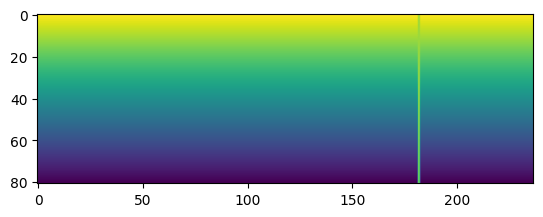

In [68]:
depth_along_slit = hdul[0].data[0,:,0,:]
plt.imshow(depth_along_slit)

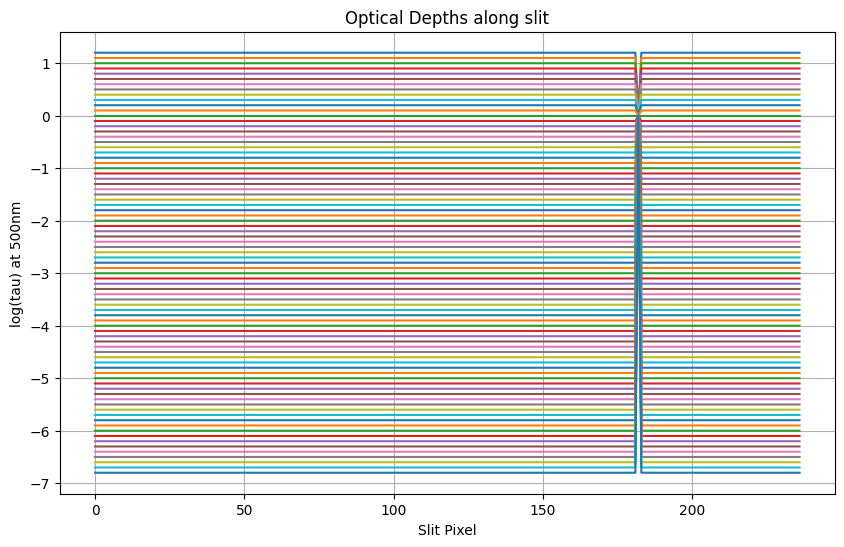

In [69]:
# Plot each row
plt.figure(figsize=(10, 6))
for i in range(depth_along_slit.shape[0]):  # Iterate over the rows
    plt.plot(depth_along_slit[i, :], label=f'Row {i}')

plt.title('Optical Depths along slit')
plt.xlabel('Slit Pixel')
plt.ylabel('log(tau) at 500nm')
plt.grid(True)
plt.show()

In [70]:
tau_slit0 = depth_along_slit[:,0]
tau_slit0

array([ 1.2,  1.1,  1. ,  0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.2,
        0.1,  0. , -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9,
       -1. , -1.1, -1.2, -1.3, -1.4, -1.5, -1.6, -1.7, -1.8, -1.9, -2. ,
       -2.1, -2.2, -2.3, -2.4, -2.5, -2.6, -2.7, -2.8, -2.9, -3. , -3.1,
       -3.2, -3.3, -3.4, -3.5, -3.6, -3.7, -3.8, -3.9, -4. , -4.1, -4.2,
       -4.3, -4.4, -4.5, -4.6, -4.7, -4.8, -4.9, -5. , -5.1, -5.2, -5.3,
       -5.4, -5.5, -5.6, -5.7, -5.8, -5.9, -6. , -6.1, -6.2, -6.3, -6.4,
       -6.5, -6.6, -6.7, -6.8], dtype='>f4')

In [71]:
np.where(depth_along_slit[0,:]==0)

(array([182]),)

In [72]:
depth_along_slit[:,182]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype='>f4')

In [5]:
hdul[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                   81                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               

In [6]:
hdul[1].data

array([ 1.2,  1.1,  1. ,  0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.2,
        0.1,  0. , -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9,
       -1. , -1.1, -1.2, -1.3, -1.4, -1.5, -1.6, -1.7, -1.8, -1.9, -2. ,
       -2.1, -2.2, -2.3, -2.4, -2.5, -2.6, -2.7, -2.8, -2.9, -3. , -3.1,
       -3.2, -3.3, -3.4, -3.5, -3.6, -3.7, -3.8, -3.9, -4. , -4.1, -4.2,
       -4.3, -4.4, -4.5, -4.6, -4.7, -4.8, -4.9, -5. , -5.1, -5.2, -5.3,
       -5.4, -5.5, -5.6, -5.7, -5.8, -5.9, -6. , -6.1, -6.2, -6.3, -6.4,
       -6.5, -6.6, -6.7, -6.8], dtype='>f4')

In [11]:
hdul[0].data[:,0,0,0]

array([ 1.20000e+00,  8.83116e+03,  3.21609e+03,  1.52590e+03,
        8.65290e+01,  7.08110e+05,  6.18240e+01, -9.29690e+00,
       -9.70440e+01,  2.70090e+05,  4.57360e-07], dtype='>f4')

(11, 81, 486, 237)

In [6]:
hdul[0].data[0].shape

(81, 486, 237)